# Principle Component Analysis(PCA)
##### PCA is the process of figuring out most important features or principal components that has the most impact on the target variable

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [106]:
m=100
X,y = make_classification(n_samples=m, n_features=10, n_classes=3, n_clusters_per_class=1)
n = len(X[0])
# A

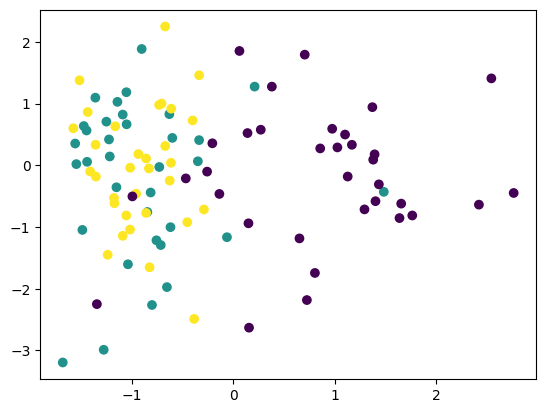

In [107]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

#### step 1. compute covariance matrix

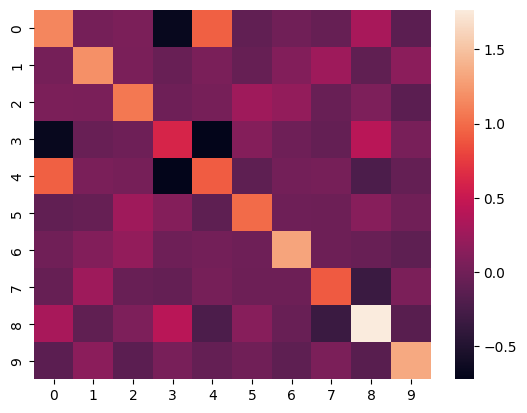

1.7663046652270251

In [108]:
X_bar = np.empty((m,n))
for i in range(n):
    X_bar[:,i] =X[:,i].mean()
cov = X - X_bar

# compute covariance matrix by taking dot product
cov = ((np.transpose(cov)).dot(cov))/(m-1)

sns.heatmap(cov)
plt.show()

max(np.diagonal(cov))

Step 2. compute eigen values and eigen vectors of covariance matrix  
Covariance Matrix = cov = (1/(N-1))(X-X̄)(X-X̄)<sup>T</sup>
Properties of covariance matrix
1. symmetrics
2. positive semi-definite
3. eigen vectors scaled by the corresponding eigen value of this covariance matrix is called principle component

In [109]:
# since variance is maximum in the largest eigen vector we will first arange vectors in descending order
# compute eigen values and eigen vectors
values, vectors = np.linalg.eig(cov)

# Sort the eigenvalues and eigen vectors in descending order 
idx = values.argsort()[::-1]
values = values[idx]
vectors = vectors[:,idx]

Step 3. Take k highest eigen value vectors  
take k such that it contains 95% of the sum of all eigen values
arrange these k eigen vectors in descending order these will be the principle components  

4


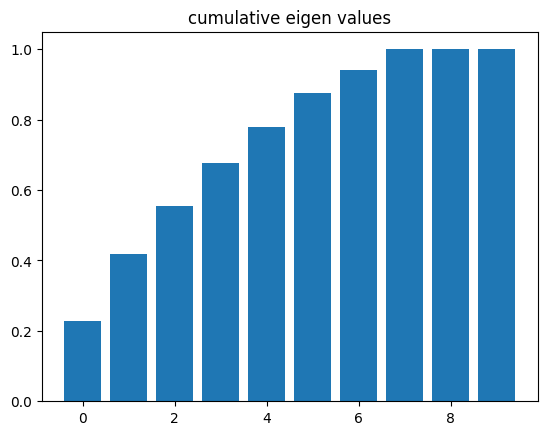

In [110]:
cumValues = np.cumsum(values)/sum(values)
x = np.arange(len(cumValues))
plt.bar(x,cumValues)
plt.title("cumulative eigen values")
# considering explained variance more than equal to 75%. This will decide how many components will come into this
k = len(cumValues[cumValues>= 0.75])
k = n - k
print(k)

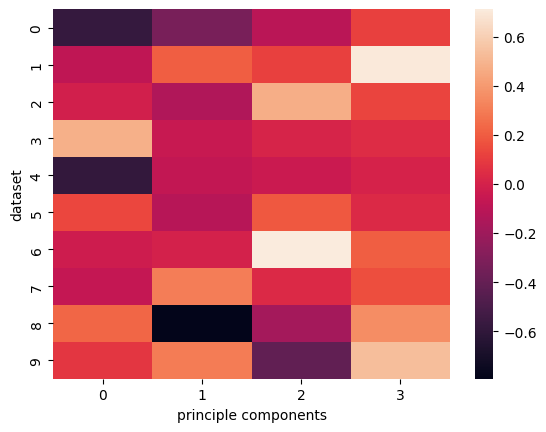

(10, 4)

In [111]:
Uk = vectors[:,:k]
sns.heatmap(Uk)
plt.xlabel("principle components")
plt.ylabel("dataset")
plt.show()
Uk.shape

Step 4. Project the Data onto the Selected Principal Components  
subtract Data from mean as axis of principle components will shift to mean.
The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data.  
The projection of the data instances onto these principal axes are called the principal components.  
projection p = (X-X̄).U<sub>k</sub>

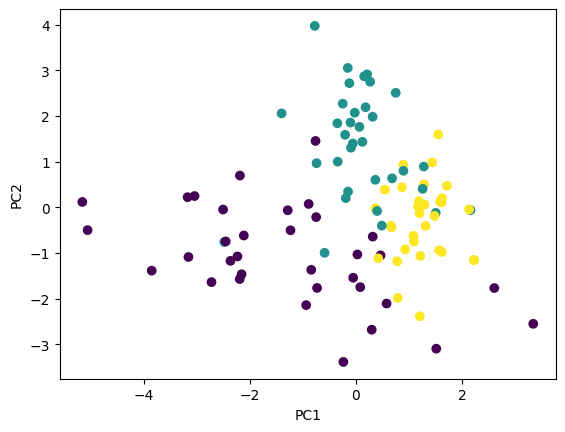

In [112]:
P = (X-X_bar).dot(Uk)
plt.scatter(P[:,0], P[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Project  
Ỹ = U<sup>T</sup>X  
Reconstruct(reconstruction have some losses)  
x̃ = U<sup>T</sup>Y  
x̃ = U<sup>T</sup>(U<sup>T</sup>X)  
x̃ = (XVS<sup>-1</sup>)  

Applications of PCA
1. classification
2. dimension reduction
3. feature extraction
4. denoising( noise = variation)

# Dual of PCA

It is used when  
(no. of rows)m >> (no. of columns)n  
(calculation of XX<sup>T</sup> or X<sup>T</sup>X becomes expensive)  
USU<sup>T</sup> = XX<sup>T</sup>  
VSV<sup>T</sup> = X<sup>T</sup>X

Projection  
X = USV<sup>T</sup>  
Y = U<sup>T</sup>X = U<sup>T</sup>(USV<sup>T</sup>) = U<sup>T</sup>USV<sup>T</sup> = SV<sup>T</sup>  
Reconstruction  
X = USV<sup>T</sup>  
XV = USV<sup>T</sup>V = US
XVS<sup>-1</sup> = USV<sup>T</sup>V = US  
X̂ = UY = U(U<sup>T</sup>X) = (XVS<sup>-1</sup>)(XVS<sup>-1</sup>)<sup>T</sup>X  
X̂ = XVS<sup>-1</sup>(S<sup>-1</sup>)<sup>T</sup>V<sup>T</sup>X<sup>T</sup>X  


#### Query point X<sub>q</sub>  
Projection  
X = USV<sup>T</sup>  
Y<sub>q</sub> = U<sup>T</sup>X<sub>q</sub> = (XVS<sup>-1</sup>)<sup>T</sup>X<sub>q</sub> = (S<sup>-1</sup>)<sup>T</sup>V<sup>T</sup>X<sup>T</sup>X<sub>q</sub>    
Reconstruction  
X̂<sub>q</sub> = UY<sub>q</sub> = U((S<sup>-1</sup>)<sup>T</sup>V<sup>T</sup>X<sup>T</sup>X<sub>q</sub>)  = (XVS<sup>-1</sup>)(S<sup>-1</sup>)<sup>T</sup>V<sup>T</sup>X<sup>T</sup>X<sub>q</sub>  
X̂<sub>q</sub> = XVS<sup>-1</sup>(S<sup>-1</sup>)<sup>T</sup>V<sup>T</sup>X<sup>T</sup>X<sub>q</sub>  